In [2]:
#Importing libraries necessary for analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from pandas_ml import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
mydata = pd.read_csv('/Users/ackahblay/Documents/phyton_Documents/Group project/german_credit_card.csv')

In [4]:
mydata.columns = mydata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
mydata = mydata.reindex(['account_balance', 'duration_of_credit_month',
                         'payment_status_of_previous_credit', 'purpose','credit_amount',
                         'value_savings/stocks', 'length_of_current_employment', 
                         'instalment_per_cent', 'sex_&_marital_status','guarantors',
                         'duration_in_current_address', 'most_valuable_available_asset',
                         'age_years','concurrent_credits','type_of_apartment',
                         'no_of_credits_at_this_bank', 'occupation','no_of_dependents',
                         'telephone','foreign_worker', 'creditability'], axis = 1)
mydata.head(5)

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,guarantors,...,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker,creditability
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,1,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,1,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,2,1,2,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,1,1,2,1


In [6]:
#information gain to identify and dropping 3 lowest attribute based on Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(0)
array = mydata.values
X1 = array[:,0:20]
Y1 = array[:,20]

model = ExtraTreesClassifier()
model.fit(X1,Y1)
print(model.feature_importances_)

[0.12356562 0.08202279 0.0595947  0.05095192 0.07892625 0.05712065
 0.05902086 0.05084984 0.04801416 0.02663957 0.05516871 0.05077048
 0.06850483 0.02805054 0.03541702 0.02640798 0.04165679 0.02171385
 0.02998904 0.0056144 ]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
account_balance                      1000 non-null int64
duration_of_credit_month             1000 non-null int64
payment_status_of_previous_credit    1000 non-null int64
purpose                              1000 non-null int64
credit_amount                        1000 non-null int64
value_savings/stocks                 1000 non-null int64
length_of_current_employment         1000 non-null int64
instalment_per_cent                  1000 non-null int64
sex_&_marital_status                 1000 non-null int64
guarantors                           1000 non-null int64
duration_in_current_address          1000 non-null int64
most_valuable_available_asset        1000 non-null int64
age_years                            1000 non-null int64
concurrent_credits                   1000 non-null int64
type_of_apartment                    1000 non-null int64
no_of_credits_at_this_bank           10

In [8]:
mydata.describe()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,guarantors,...,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker,creditability
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


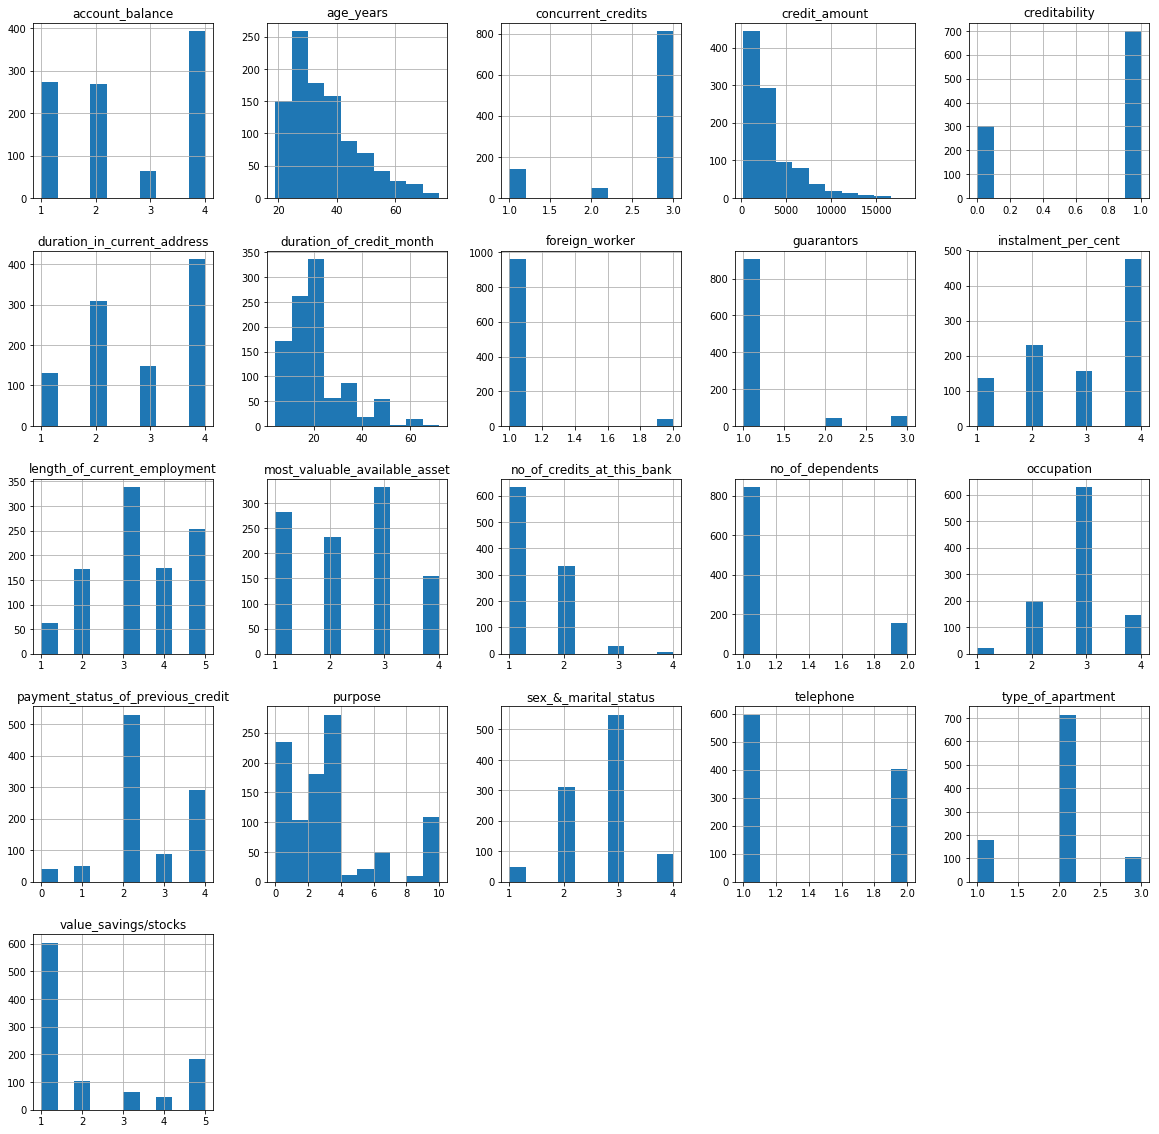

In [9]:
mydata.hist(figsize = (20,20))
pyplot.show()

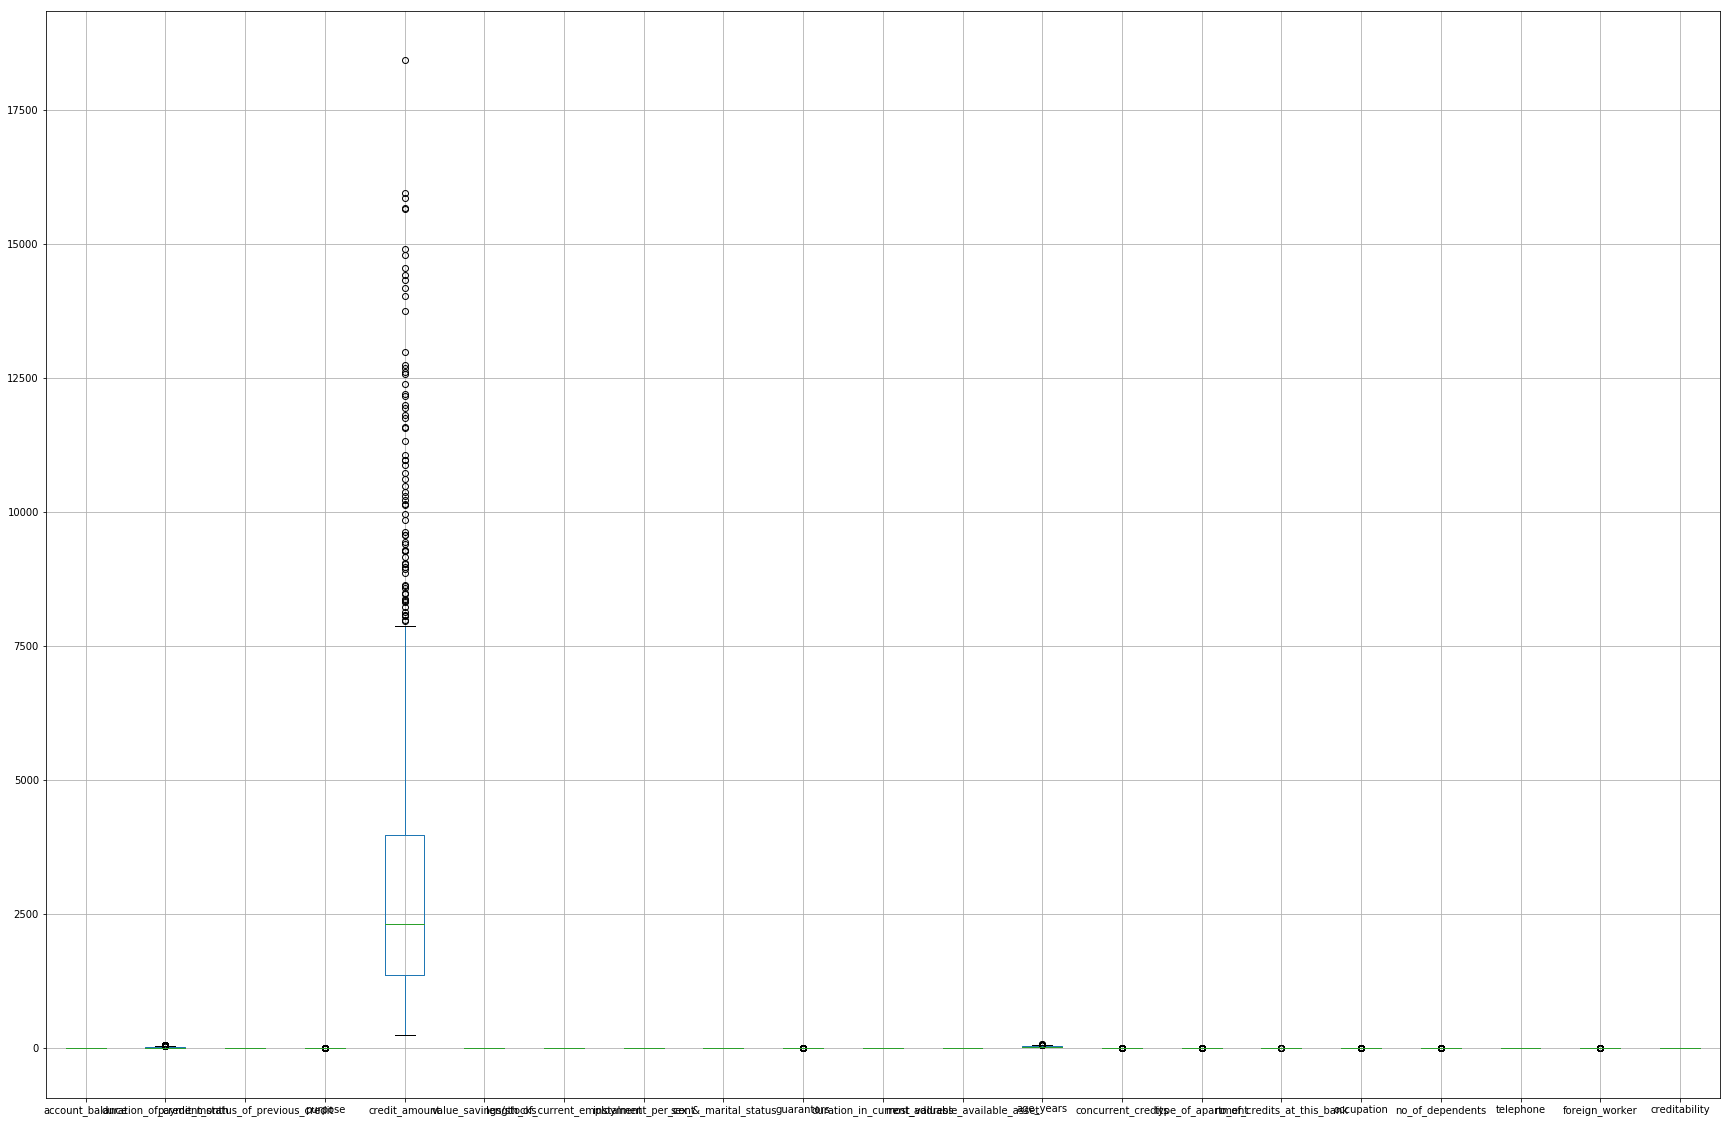

In [10]:
mydata.boxplot(figsize = (30,20))
pyplot.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


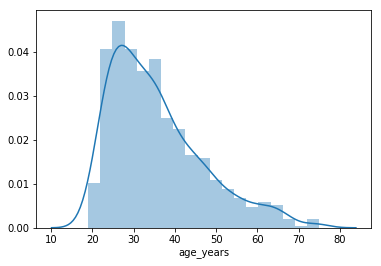

In [11]:
sns.distplot(mydata['age_years'])
pyplot.show()

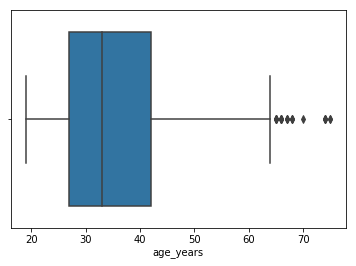

In [12]:
sns.boxplot(mydata['age_years'])
pyplot.show()

In [13]:
#because data is skewed -- best measure for central 
mydata.age_years.median()

33.0

In [14]:
mydata.loc[(mydata.age_years > 68), 'age_years'] = 33.0


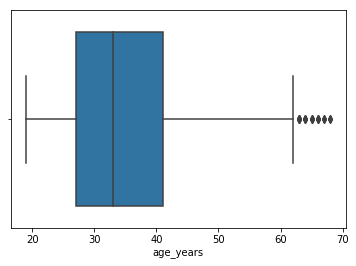

In [15]:
sns.boxplot(mydata['age_years'])
pyplot.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


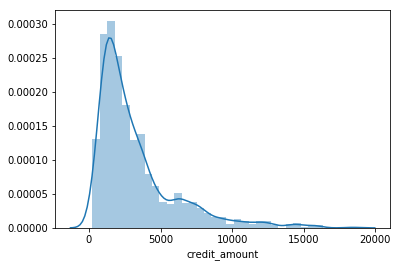

In [16]:
sns.distplot(mydata['credit_amount'])
pyplot.show()

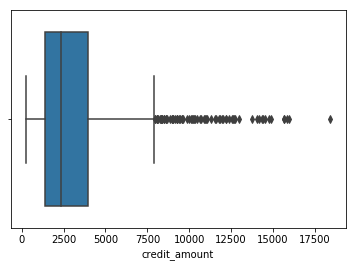

In [17]:
sns.boxplot(mydata['credit_amount'])
pyplot.show()

In [18]:
mydata['credit_amount'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      250.0
0.1      934.7
0.2     1262.0
0.3     1479.4
0.4     1906.8
0.5     2319.5
0.6     2852.4
0.7     3590.0
0.8     4720.0
0.9     7179.4
1.0    18424.0
Name: credit_amount, dtype: float64

In [19]:
mydata.credit_amount.median()

2319.5

In [20]:
mydata.loc[(mydata.credit_amount > 8471.96), 'credit_amount'] = 2319.5


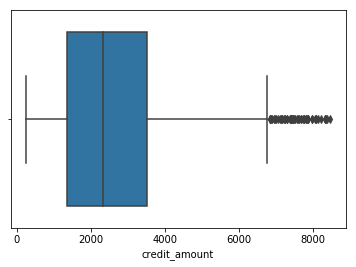

In [21]:
sns.boxplot(mydata['credit_amount'])
pyplot.show()

In [22]:
#Order of attribute by importance based on cleaned data, outliers in age and credit amount trimmed
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(0)
array = mydata.values
X1 = array[:,0:20]
Y1 = array[:,20]

model = ExtraTreesClassifier()
model.fit(X1,Y1)
print(model.feature_importances_)

[0.12670465 0.08057005 0.06263032 0.0597618  0.07168326 0.04998225
 0.05999239 0.05348418 0.04075816 0.02755099 0.05025798 0.05501099
 0.06641465 0.03237918 0.03299566 0.03364407 0.03905493 0.02136963
 0.02893904 0.00681581]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
mydata.columns[:20]

Index(['account_balance', 'duration_of_credit_month',
       'payment_status_of_previous_credit', 'purpose', 'credit_amount',
       'value_savings/stocks', 'length_of_current_employment',
       'instalment_per_cent', 'sex_&_marital_status', 'guarantors',
       'duration_in_current_address', 'most_valuable_available_asset',
       'age_years', 'concurrent_credits', 'type_of_apartment',
       'no_of_credits_at_this_bank', 'occupation', 'no_of_dependents',
       'telephone', 'foreign_worker'],
      dtype='object')

'account_balance', 'duration_of_credit_month',
'payment_status_of_previous_credit', 'purpose','credit_amount',
'value_savings/stocks', 'length_of_current_employment', 
'instalment_per_cent', 'sex_&_marital_status','guarantors',
'duration_in_current_address', 'most_valuable_available_asset',
'age_years','concurrent_credits','type_of_apartment',
'no_of_credits_at_this_bank', 'occupation','no_of_dependents',
'telephone','foreign_worker', 'creditability'

In [24]:
#Split dataset into train and test sets
#features = mydata.values[:,:20]
#targets = mydata.values[:,20]
x = mydata.iloc[:, 0:20].values  
y = mydata.iloc[:, 20].values  


features_train, features_test, targets_train, targets_test = train_test_split(x, y, test_size = 0.33,
                                                                             random_state = 10)

In [25]:
#Naive Bayes classifier
clf = GaussianNB()
clf.fit(features_train, targets_train)
target_pred = clf.predict(features_test)
df_table = ConfusionMatrix(targets_test, target_pred)

#print("Confusion matrix:\n%s" % df_table)
print("Accuracy Score:", accuracy_score(targets_test, target_pred, normalize = True))
print("Precision Score:", precision_score(targets_test, target_pred, average = 'weighted'))

Accuracy Score: 0.7333333333333333
Precision Score: 0.7602788697632407


In [26]:
#Decision tree classification
class_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)
class_gini.fit(features_train, targets_train)
y_pred = class_gini.predict(features_test)
print( "Accuracy Score:" , accuracy_score(targets_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(targets_test, y_pred, average = 'weighted'))

Accuracy Score: 0.7333333333333333
Precision Score: 0.7193641667949968


In [27]:
#Random Forest Classifier
rfm = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1 , random_state = 101, 
                            max_features = None, min_samples_leaf = 30)
rfm.fit(features_train, targets_train)
y_pred = rfm.predict(features_test)
print("Accuracy Score:" , accuracy_score(targets_test, y_pred, normalize = True))
print("Precision Score:", precision_score(targets_test, y_pred, average = 'weighted'))

Accuracy Score: 0.7333333333333333
Precision Score: 0.7161879056615899


In [28]:
#x = mydata.iloc[:, 0:20].values  
#y = mydata.iloc[:, 20].values  

from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)  

#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

#from sklearn.ensemble import RandomForestClassifier  
#classifier = RandomForestClassifier(n_estimators=300, random_state=0)  

#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5)  

print(all_accuracies)  
print(all_accuracies.mean())  

[0.64444444 0.31851852 0.69402985 0.70676692 0.69172932]
0.611097810862147


In [29]:
#Trimmed dataset using full dataset
#RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score  
RForest_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(RForest_5Fold)  
print(RForest_5Fold.mean()) 


[0.71851852 0.76296296 0.73880597 0.76691729 0.73684211]
0.7448093700253952


In [30]:
#Trimmed dataset using full dataset
#DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)

from sklearn.model_selection import cross_val_score  
DTree_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(DTree_5Fold)  
print(DTree_5Fold.mean()) 



[0.6962963  0.65925926 0.69402985 0.7518797  0.71428571]
0.7031501639671317


In [31]:
#Trimmed dataset using full dataset
#naive_bayes
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
NBayes_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(NBayes_5Fold)  
print(NBayes_5Fold.mean()) 

[0.64444444 0.31851852 0.69402985 0.70676692 0.69172932]
0.611097810862147


In [32]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
mydata_new = mydata
mydata_new.drop(['guarantors','no_of_dependents', 'foreign_worker'], axis=1, inplace=True)

In [33]:
mydata_new.head(5)

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,telephone,creditability
0,1,18,4,2,1049.0,1,2,4,2,4,2,21.0,3,1,1,3,1,1
1,1,9,4,0,2799.0,1,3,2,3,2,1,36.0,3,1,2,3,1,1
2,2,12,2,9,841.0,2,4,2,2,4,1,23.0,3,1,1,2,1,1
3,1,12,4,0,2122.0,1,3,3,3,2,1,39.0,3,1,2,2,1,1
4,1,12,4,0,2171.0,1,3,4,3,4,2,38.0,1,2,2,2,1,1


In [34]:
mydata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
account_balance                      1000 non-null int64
duration_of_credit_month             1000 non-null int64
payment_status_of_previous_credit    1000 non-null int64
purpose                              1000 non-null int64
credit_amount                        1000 non-null float64
value_savings/stocks                 1000 non-null int64
length_of_current_employment         1000 non-null int64
instalment_per_cent                  1000 non-null int64
sex_&_marital_status                 1000 non-null int64
duration_in_current_address          1000 non-null int64
most_valuable_available_asset        1000 non-null int64
age_years                            1000 non-null float64
concurrent_credits                   1000 non-null int64
type_of_apartment                    1000 non-null int64
no_of_credits_at_this_bank           1000 non-null int64
occupation                         

In [35]:
mydata_new.describe()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,telephone,creditability
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,2721.129000,2.105000,3.384000,2.973000,2.68200,2.845000,2.358000,35.257000,2.675000,1.928000,1.407000,2.904000,1.404000,0.700000
std,1.257638,12.058814,1.08312,2.744439,1828.478378,1.580023,1.208306,1.118715,0.70808,1.103718,1.050209,10.891261,0.705601,0.530186,0.577654,0.653614,0.490943,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.000000,2.00000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.250000,1.000000,3.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3529.000000,3.000000,5.000000,4.000000,3.00000,4.000000,3.000000,41.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,8471.000000,5.000000,5.000000,4.000000,4.00000,4.000000,4.000000,68.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000


In [36]:
#Split dataset into train and test sets
features = mydata_new.values[:,:17]
targets = mydata_new.values[:,17]
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.33,
                                                                             random_state = 10)

In [37]:
#Naive Bayes classifier
clf = GaussianNB()
clf.fit(features_train, targets_train)
target_pred = clf.predict(features_test)
df_table = ConfusionMatrix(targets_test, target_pred)

#print("Confusion matrix:\n%s" % df_table)
print("Accuracy Score:", accuracy_score(targets_test, target_pred, normalize = True))
print("Precision Score:", precision_score(targets_test, target_pred, average = 'weighted'))

Accuracy Score: 0.7272727272727273
Precision Score: 0.720632210219797


In [38]:
#Decision tree classification
class_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)
class_gini.fit(features_train, targets_train)
y_pred1 = class_gini.predict(features_test)
print( "Accuracy Score:" , accuracy_score(targets_test, y_pred1, normalize = True))
print( "Precision Score:" , precision_score(targets_test, y_pred1, average = 'weighted'))

Accuracy Score: 0.7333333333333333
Precision Score: 0.7193641667949968


In [39]:
#Random Forest Classifier
rfm = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1 , random_state = 101, 
                            max_features = None, min_samples_leaf = 30)
rfm.fit(features_train, targets_train)
y_pred2 = rfm.predict(features_test)
print("Accuracy Score:" , accuracy_score(targets_test, y_pred2, normalize = True))
print("Precision Score:", precision_score(targets_test, y_pred2, average = 'weighted'))

Accuracy Score: 0.7333333333333333
Precision Score: 0.7161879056615899


In [40]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#RandomForestClassifier - 5 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score  
RandForest_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(RandForest_5Fold)  
print(RandForest_5Fold.mean()) 



[0.7037037  0.76296296 0.76119403 0.77443609 0.7593985 ]
0.7523390565967157


In [41]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#DecisionTreeClassifier - 5 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)

from sklearn.model_selection import cross_val_score  
DecTree_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(DecTree_5Fold)  
print(DecTree_5Fold.mean()) 




[0.6962963  0.65925926 0.7238806  0.7518797  0.71428571]
0.7091203132208632


In [42]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#naive_bayes - 5 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
NaiveB_5Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=5) 

print(NaiveB_5Fold)  
print(NaiveB_5Fold.mean()) 

[0.71851852 0.74074074 0.76119403 0.72932331 0.7443609 ]
0.7388274999272642


In [43]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#RandomForestClassifier - 10 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score  
RandFor_10Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=10) 

print(RandFor_10Fold)  
print(RandFor_10Fold.mean()) 

[0.67647059 0.72058824 0.79411765 0.7761194  0.73134328 0.7761194
 0.79104478 0.72727273 0.74242424 0.78787879]
0.7523379093835635


In [44]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#DecisionTreeClassifier - 10 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 8)

from sklearn.model_selection import cross_val_score  
DecTree_10Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=10) 

print(DecTree_10Fold)  
print(DecTree_10Fold.mean()) 

[0.75       0.63235294 0.79411765 0.70149254 0.70149254 0.7761194
 0.68656716 0.77272727 0.6969697  0.68181818]
0.719365738154149


In [45]:
#Trimmed dataset using information gain to identify and dropping 3 lowest attribute
#naive_bayes - 10 fold cross validation
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(features_train)  
test_features = feature_scaler.transform(features_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
NaiveB_10Fold = cross_val_score(estimator=classifier, X=train_features, y=targets_train, cv=10) 

print(NaiveB_10Fold)  
print(NaiveB_10Fold.mean()) 

[0.69117647 0.72058824 0.80882353 0.70149254 0.73134328 0.82089552
 0.70149254 0.74242424 0.72727273 0.74242424]
0.7387933328012345


In [50]:
#Simple Data Split Accuracy Scores
print( "Random Forest Accuracy Score:" , accuracy_score(targets_test, y_pred2, normalize = True))
print( "Decision Tree Accuracy Score:" , accuracy_score(targets_test, y_pred1, normalize = True))
print("Naive Bayes Accuracy Score:", accuracy_score(targets_test, target_pred, normalize = True))

Random Forest Accuracy Score: 0.7333333333333333
Decision Tree Accuracy Score: 0.7333333333333333
Naive Bayes Accuracy Score: 0.7272727272727273


In [48]:
#N Fold Cross Validatation Data Split Accuracy scores without trimmed data
print("Random Forest 5Fold:" , RForest_5Fold.mean()) 
print("Decision Tree 5Fold:", DTree_5Fold.mean()) 
print("Naive Bayes 5Fold:",NBayes_5Fold.mean())

Random Forest 5Fold: 0.7448093700253952
Decision Tree 5Fold: 0.7031501639671317
Naive Bayes 5Fold: 0.611097810862147


In [49]:
#N Fold Cross Validatation Data Split Accuracy scores with trimmed data
print("Random Forest 5Fold:" , RandForest_5Fold.mean()) 
print("Random Forest 10Fold:" ,RandFor_10Fold.mean()) 
print("Decision Tree 5Fold:", DecTree_5Fold.mean()) 
print("Decision Tree 10Fold:",DecTree_10Fold.mean()) 
print("Naive Bayes 5Fold:",NaiveB_5Fold.mean()) 
print("Naive Bayes 10Fold:", NaiveB_10Fold.mean()) 

Random Forest 5Fold: 0.7523390565967157
Random Forest 10Fold: 0.7523379093835635
Decision Tree 5Fold: 0.7091203132208632
Decision Tree 10Fold: 0.719365738154149
Naive Bayes 5Fold: 0.7388274999272642
Naive Bayes 10Fold: 0.7387933328012345
